In [1]:
import os
os.environ['NUMPY_EXPERIMENTAL_ARRAY_FUNCTION'] = '0'

In [2]:
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import numpy_groupies as npg
import pandas as pd
import scipy.stats as stats
import scipy.special as ss
import sortedcontainers as sc

import tqdm
import pickle

Trying to identify whether these 100 ll jumps are real, or some type of bug

### Load libraries

In [3]:
from statsmodels.discrete.discrete_model import NegativeBinomial as statsNB

In [4]:
os.environ["CAPY_REF_FA"] = "/home/opriebe/data/ref/hg19/Homo_sapiens_assembly19.fasta"
import hapaseg.coverage_MCMC as mcmc_cov
import hapaseg.NB_coverage_MCMC as nb_cov
from capy import mut, seq

Cannot find path to gnomAD index; gnomAD functionality disabled.


In [5]:
import hapaseg.coverage_DP as dp_cov
import hapaseg.a_cov_DP as dp_a_cov

In [6]:
colors = mpl.cm.get_cmap("tab20").colors

In [7]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 30

In [8]:
multidraw_df = pd.read_pickle('exome_results/acdp_df.pickle')

In [9]:
mcmc_data = np.load('exome_results/coverage_mcmc_clusters/cov_mcmc_collected_data.npz')
beta = mcmc_data['beta']

In [10]:
allelic_segs = pd.read_pickle("exome/6_C1D1_META.allelic_segs.auto_ref_correct.overdispersion92.no_phase_correct.pickle")
chrbdy = allelic_segs.dropna().loc[:, ["start", "end"]]
chr_ends = chrbdy.loc[chrbdy["start"] != 0, "end"].cumsum()

alpha=50 multidraw

In [73]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [74]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=False)

In [16]:
%%prun
a_cov_dp.run(1)

n unassigned: 1153
skipping iteration 0 due to nan. picked segment 1345
skipping iteration 8 due to nan. picked segment 651
skipping iteration 13 due to nan. picked segment 828
skipping iteration 16 due to nan. picked segment 170
skipping iteration 21 due to nan. picked segment 965
n unassigned: 1035
n unassigned: 933
n unassigned: 839
n unassigned: 749
n unassigned: 676
n unassigned: 606
n unassigned: 530
n unassigned: 463
n unassigned: 422
n unassigned: 375
n unassigned: 332
n unassigned: 298
n unassigned: 272
n unassigned: 243
n unassigned: 208
n unassigned: 183
n unassigned: 158
n unassigned: 89
n unassigned: 18
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
 

         136747715 function calls (135797803 primitive calls) in 334.441 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 30566077  221.200    0.000  221.200    0.000 {built-in method numpy.asanyarray}
   422666   17.446    0.000   26.786    0.000 a_cov_DP.py:209(ML_normalgamma)
1383348/538016   15.470    0.000  254.758    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
   422666   11.763    0.000  235.723    0.001 shape_base.py:23(atleast_1d)
   422666    9.872    0.000  303.871    0.001 a_cov_DP.py:200(_ML_cluster)
  1476191    9.600    0.000    9.600    0.000 {method 'reduce' of 'numpy.ufunc' objects}
 59491511    5.754    0.000    5.754    0.000 {method 'append' of 'list' objects}
   999705    4.158    0.000   15.481    0.000 _methods.py:162(_mean)
   999705    3.416    0.000    3.723    0.000 _methods.py:66(_count_reduce_items)
   154360    3.265    0.000    4.230    0.000 a_cov_DP.py:305(

In [13]:
%%prun
a_cov_dp.run(1)

n unassigned: 1155
skipping iteration 3 due to nan. picked segment 1334
skipping iteration 4 due to nan. picked segment 845
skipping iteration 5 due to nan. picked segment 958
skipping iteration 11 due to nan. picked segment 558
n unassigned: 1048
n unassigned: 938
n unassigned: 836
n unassigned: 753
n unassigned: 682
n unassigned: 612
n unassigned: 555
n unassigned: 499
n unassigned: 446
n unassigned: 405
n unassigned: 362
n unassigned: 331
n unassigned: 299
n unassigned: 265
n unassigned: 240
n unassigned: 205
n unassigned: 186
n unassigned: 164
n unassigned: 139
n unassigned: 64
n unassigned: 6
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n un

         366816569 function calls (364427505 primitive calls) in 611.037 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 82340794  318.308    0.000  318.308    0.000 {built-in method numpy.asanyarray}
3530855/1274507   63.627    0.000  464.396    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
  1128174   36.907    0.000  392.462    0.000 shape_base.py:23(atleast_1d)
   564087   35.282    0.000  568.255    0.001 a_cov_DP.py:200(_ML_cluster)
 40501434   29.520    0.000   29.520    0.000 {method 'reshape' of 'numpy.ndarray' objects}
   564087   24.444    0.000   37.767    0.000 a_cov_DP.py:213(ML_normalgamma)
  3098440   17.250    0.000   17.250    0.000 {method 'reduce' of 'numpy.ufunc' objects}
162474852   15.220    0.000   15.220    0.000 {method 'append' of 'list' objects}
  1337890    6.674    0.000   22.514    0.000 _methods.py:162(_mean)
  1337890    5.371    0.000    5.811    0.000 _meth

testing using stored arrays instead of lists for r

In [94]:
%%prun
a_cov_dp.run(1)

n unassigned: 1155
skipping iteration 0 due to nan. picked segment 368
n unassigned: 1037
n unassigned: 927
n unassigned: 823
n unassigned: 727
n unassigned: 650
n unassigned: 598
n unassigned: 543
n unassigned: 478
n unassigned: 422
n unassigned: 379
n unassigned: 331
n unassigned: 294
n unassigned: 261
n unassigned: 229
n unassigned: 213
n unassigned: 191
n unassigned: 165
n unassigned: 111
n unassigned: 49
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
 

         110977317 function calls (109993251 primitive calls) in 98.619 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   432682   14.263    0.000   23.888    0.000 a_cov_DP.py:219(ML_normalgamma)
1415845/550481   13.803    0.000   31.150    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
  1809322    9.818    0.000    9.818    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   432682    9.246    0.000   14.142    0.000 shape_base.py:23(atleast_1d)
   432682    8.384    0.000   42.387    0.000 a_cov_DP.py:204(_cluster_gen_from_list)
 54284314    5.138    0.000    5.138    0.000 {method 'append' of 'list' objects}
  1017436    4.242    0.000   15.028    0.000 _methods.py:162(_mean)
  1017436    3.187    0.000    3.493    0.000 _methods.py:66(_count_reduce_items)
 27979152    2.507    0.000    2.507    0.000 {built-in method numpy.asanyarray}
   152057    2.041    0.000    3.073    0.000 a_cov_

In [84]:
segs = np.random.choice(a_cov_dp.num_segments, size = 100, replace=False)

In [85]:
%%time
r_lst=[]
for seg in segs:
    r_lst.append(a_cov_dp.segment_r_list[seg])
r = np.hstack(r_lst)

CPU times: user 1.74 ms, sys: 3 µs, total: 1.75 ms
Wall time: 1.11 ms


In [86]:
shortened_segs = segs[:-1]

In [87]:
r_lst=[]
for seg in shortened_segs:
    r_lst.append(a_cov_dp.segment_r_list[seg])
r = np.hstack(r_lst)

In [88]:
a_cov_dp.segment_r_list[segs[-1]]

array([4.92341026, 5.32118059, 4.86201455, 4.77342114, 4.30054429,
       4.20073238, 4.91126643])

In [89]:
%%time
r_cat = np.concatenate([r, a_cov_dp.segment_r_list[segs[-1]]], axis=0)

CPU times: user 100 µs, sys: 0 ns, total: 100 µs
Wall time: 73.4 µs


In [90]:
np.concatenate([np.ones(5), np.ones(8)], axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [91]:
segs[-1]

1271

In [92]:
r.shape

(11571,)

In [93]:
%%time
st = a_cov_dp.segment_cov_bins[segs[:50]].sum()
en = st + a_cov_dp.segment_cov_bins[segs[50]]
np.concatenate([r[:st], r[:en]], axis=0)

CPU times: user 199 µs, sys: 0 ns, total: 199 µs
Wall time: 177 µs


array([30.44615813, 29.49486271, 30.61148014, ..., 74.74801531,
       74.93983412, 75.67545141])

(6660, 6679)

In [95]:
a_cov_dp.cluster_dict.keys()[0]

2

In [98]:
%%time
a_cov_dp.cluster_dict[2].index(685)

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 26.7 µs


54

after optimizing datapoint arrays

In [39]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [40]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=False)

In [16]:
%%prun
a_cov_dp.run(1)

n unassigned: 1157
skipping iteration 4 due to nan. picked segment 365
skipping iteration 14 due to nan. picked segment 431
n unassigned: 1056
n unassigned: 954
n unassigned: 857
n unassigned: 771
n unassigned: 696
n unassigned: 638
n unassigned: 571
n unassigned: 511
n unassigned: 449
n unassigned: 394
n unassigned: 360
n unassigned: 326
n unassigned: 286
n unassigned: 250
n unassigned: 222
n unassigned: 194
n unassigned: 178
n unassigned: 152
n unassigned: 93
n unassigned: 32
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
 

         67520868 function calls (67517495 primitive calls) in 63.249 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   372793   12.466    0.000   15.620    0.000 a_cov_DP.py:252(ML_normalgamma)
   420554    8.989    0.000    8.989    0.000 {built-in method numpy.concatenate}
  1207955    6.570    0.000    6.570    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   279634    5.867    0.000    9.053    0.000 shape_base.py:23(atleast_1d)
   279634    5.850    0.000   25.674    0.000 a_cov_DP.py:207(_cluster_gen_from_list)
 35548343    3.435    0.000    3.435    0.000 {method 'append' of 'list' objects}
   509631    2.188    0.000    7.826    0.000 _methods.py:162(_mean)
   136837    1.930    0.000    2.891    0.000 a_cov_DP.py:348(DP_split_prior)
   509631    1.727    0.000    1.883    0.000 _methods.py:66(_count_reduce_items)
 18127429    1.609    0.000    1.609    0.000 {built-in method numpy.asanyarray}
     4455    1.60

In [112]:
%%prun
a_cov_dp.run(1)

n unassigned: 1157
n unassigned: 1031
n unassigned: 934
n unassigned: 836
n unassigned: 761
n unassigned: 687
n unassigned: 623
n unassigned: 573
n unassigned: 509
n unassigned: 450
n unassigned: 405
n unassigned: 360
n unassigned: 337
n unassigned: 301
n unassigned: 278
n unassigned: 250
n unassigned: 225
n unassigned: 200
n unassigned: 180
n unassigned: 142
n unassigned: 75
n unassigned: 5
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
 

         62148524 function calls (61607818 primitive calls) in 60.574 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   370239   11.508    0.000   14.505    0.000 a_cov_DP.py:252(ML_normalgamma)
1016689/479579    8.634    0.000   18.569    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
  1188030    6.248    0.000    6.248    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   268555    5.099    0.000    7.815    0.000 shape_base.py:23(atleast_1d)
   268555    5.024    0.000   23.686    0.000 a_cov_DP.py:207(_cluster_gen_from_list)
 30233722    2.866    0.000    2.866    0.000 {method 'append' of 'list' objects}
   501443    2.219    0.000    7.668    0.000 _methods.py:162(_mean)
   131201    1.782    0.000    2.689    0.000 a_cov_DP.py:348(DP_split_prior)
   501443    1.696    0.000    1.857    0.000 _methods.py:66(_count_reduce_items)
     4683    1.691    0.000    1.999    0.000 a_cov_DP.py

after optimizing splits

In [41]:
%%prun
a_cov_dp.run(1)

n unassigned: 1156
skipping iteration 6 due to nan. picked segment 1313
skipping iteration 27 due to nan. picked segment 434
n unassigned: 1047
n unassigned: 948
n unassigned: 853
n unassigned: 760
n unassigned: 694
n unassigned: 624
n unassigned: 558
n unassigned: 508
n unassigned: 468
n unassigned: 419
n unassigned: 370
n unassigned: 324
n unassigned: 288
n unassigned: 267
n unassigned: 239
n unassigned: 213
n unassigned: 195
n unassigned: 168
n unassigned: 122
n unassigned: 66
n unassigned: 12
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
 

         13593517 function calls (13589773 primitive calls) in 35.789 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   383052   11.184    0.000   14.180    0.000 a_cov_DP.py:257(ML_normalgamma)
  1220290    6.145    0.000    6.145    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   517327    2.018    0.000    7.138    0.000 _methods.py:162(_mean)
     4792    1.902    0.000    2.198    0.000 a_cov_DP.py:329(DP_tuple_split_prior)
   132113    1.686    0.000    2.533    0.000 a_cov_DP.py:353(DP_split_prior)
   517327    1.494    0.000    1.634    0.000 _methods.py:66(_count_reduce_items)
   172181    1.410    0.000    1.410    0.000 {built-in method numpy.concatenate}
        1    1.393    1.393   35.788   35.788 a_cov_DP.py:399(run)
    18796    1.180    0.000    1.442    0.000 {method 'choice' of 'numpy.random.mtrand.RandomState' objects}
     2355    0.514    0.000    0.589    0.000 a_cov_DP.py:315(DP_merge_prior)
   

In [96]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [97]:
##looking at warm start
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [98]:
%%prun
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
 

         42123498 function calls (42117043 primitive calls) in 88.808 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1306364   31.113    0.000   37.897    0.000 a_cov_DP.py:257(ML_normalgamma)
  3098362   11.689    0.000   11.689    0.000 {method 'reduce' of 'numpy.ufunc' objects}
  1449172    5.616    0.000   17.660    0.000 _methods.py:162(_mean)
  1081908    5.190    0.000    5.190    0.000 {built-in method numpy.concatenate}
  1449172    4.201    0.000    4.604    0.000 _methods.py:66(_count_reduce_items)
     2607    3.575    0.001    3.794    0.001 a_cov_DP.py:315(DP_merge_prior)
     5167    2.413    0.000    3.017    0.001 a_cov_DP.py:329(DP_tuple_split_prior)
    10394    2.388    0.000    2.725    0.000 a_cov_DP.py:311(<listcomp>)
   140852    1.865    0.000    2.768    0.000 a_cov_DP.py:355(DP_split_prior)
        1    1.736    1.736   88.807   88.807 a_cov_DP.py:401(run)
    20056    1.596    0.000    1.946  

In [95]:
%%prun
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
 

         37627001 function calls (37622234 primitive calls) in 88.188 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1173075   26.448    0.000   32.059    0.000 a_cov_DP.py:257(ML_normalgamma)
     3539   15.159    0.004   15.674    0.004 a_cov_DP.py:329(DP_tuple_split_prior)
  2610320    9.082    0.000    9.082    0.000 {method 'reduce' of 'numpy.ufunc' objects}
  1248271    4.956    0.000   15.048    0.000 _methods.py:162(_mean)
  1063299    4.700    0.000    4.700    0.000 {built-in method numpy.concatenate}
  1248271    3.711    0.000    4.071    0.000 _methods.py:66(_count_reduce_items)
     1696    3.285    0.002    3.454    0.002 a_cov_DP.py:315(DP_merge_prior)
     6994    2.456    0.000    2.803    0.000 a_cov_DP.py:311(<listcomp>)
  6857514    1.325    0.000    1.380    0.000 _collections_abc.py:760(__iter__)
   699821    1.173    0.000   31.197    0.000 a_cov_DP.py:239(_ML_cluster_add_one)
        1    1.126  

In [109]:
%%time
ss.loggamma(0.5)

CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 23.6 µs


0.5723649429247

In [21]:
clust_pick_segs = np.r_[a_cov_dp.cluster_dict[6]]

In [22]:
clust_pick_segs

array([  10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   73,
         74,  133,  136,  279,  281,  584,  585,  586,  587,  588,  589,
        590,  591,  592,  593, 1494, 1495, 1496, 1497, 1498, 1499, 1500,
       1501, 1502, 1503])

In [28]:
seg_means = np.array([a_cov_dp.segment_r_list[i].mean() for i in clust_pick_segs])
sort_indices = np.argsort(seg_means)
sorted_vals = seg_means[sort_indices]
tot_list = []
stay_ml = a_cov_dp.cluster_MLs[6]
search_inds = np.r_[1:len(sorted_vals)]

    

In [30]:
%%time
clust_pick_segs[sort_indices[:4]]

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 17.2 µs


array([281,  16,  18,  11])

In [32]:
%%time
clust_pick_segs[sort_indices][:4]

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11.4 µs


array([281,  16,  18,  11])

In [33]:
%%time
sorted_vals[:4]

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10 µs


array([172.9254589 , 175.14107837, 175.39933824, 176.64821617])

In [36]:
tst = a_cov_dp._cluster_gen_from_list(clust_pick_segs[sort_indices])

In [37]:
tst.shape

(3528,)

In [38]:
a_cov_dp.segment_cov_bins[

array([ 85, 185, 162, ...,  41,  41,  41])

<img src="./multirun_res.png"/>

coldstart
<img src="./multirun_res_cold.png" />

coldstart 200 extra draws
<img src="./multirun_res_cold_200.png" />

In [43]:
with open('saved_multirun_cold.pickle', 'rb') as f:
    model_lst = pickle.load(f)

In [44]:
a_cov_dp = model_lst[-2]

Text(0.5, 0, 'iteration')

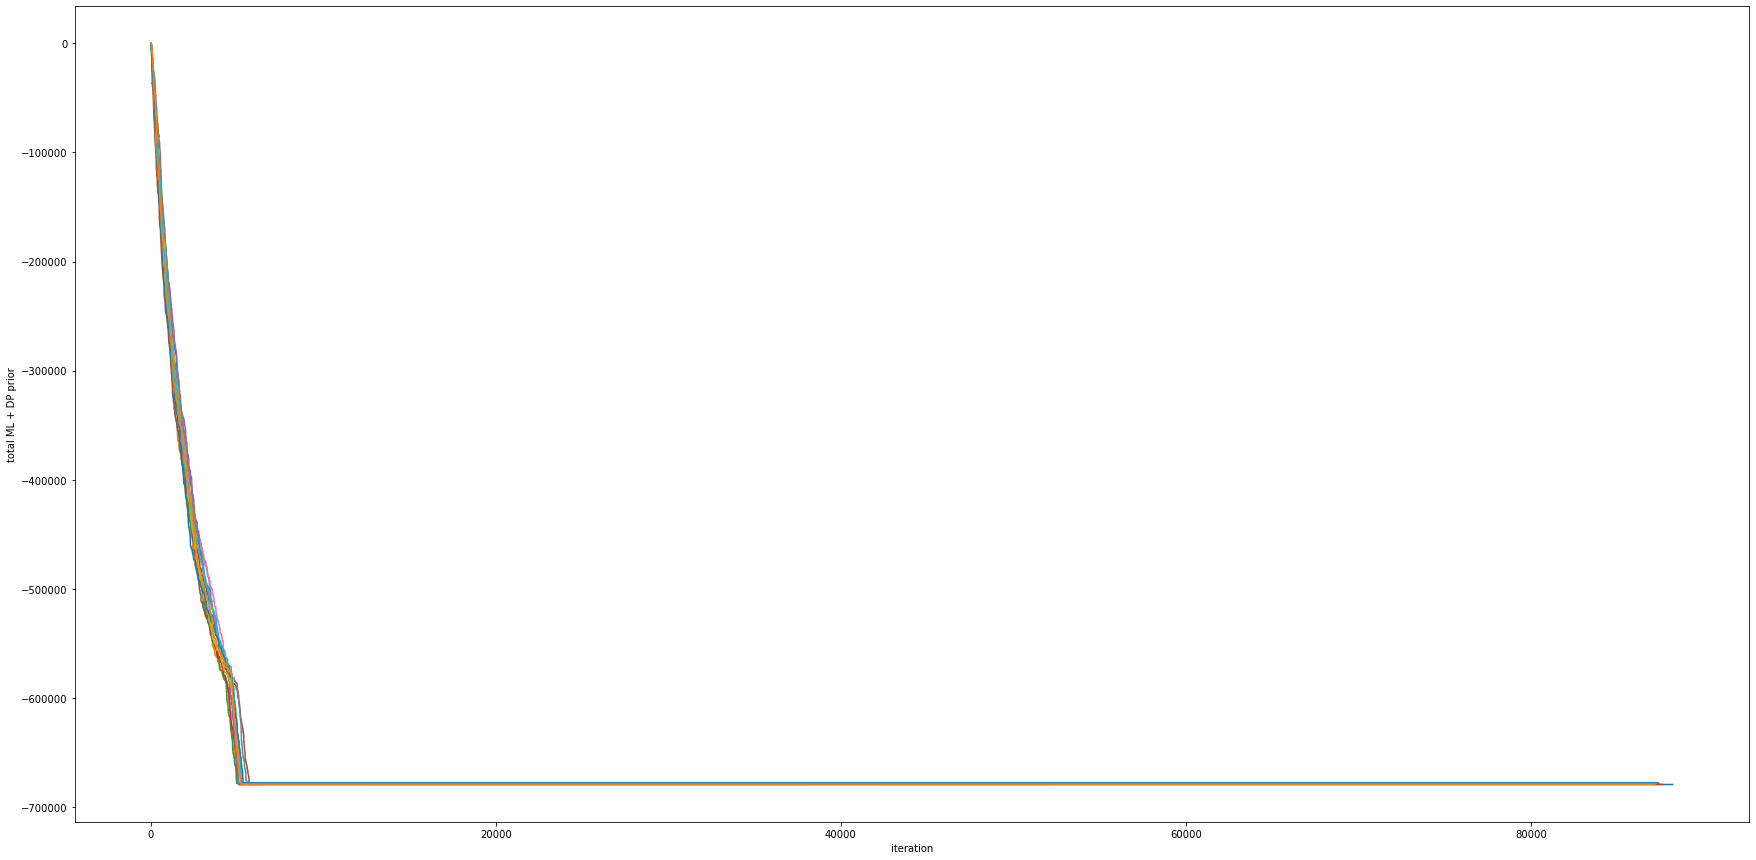

In [69]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[:len(m.MLDP_total_history)], m.MLDP_total_history)
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

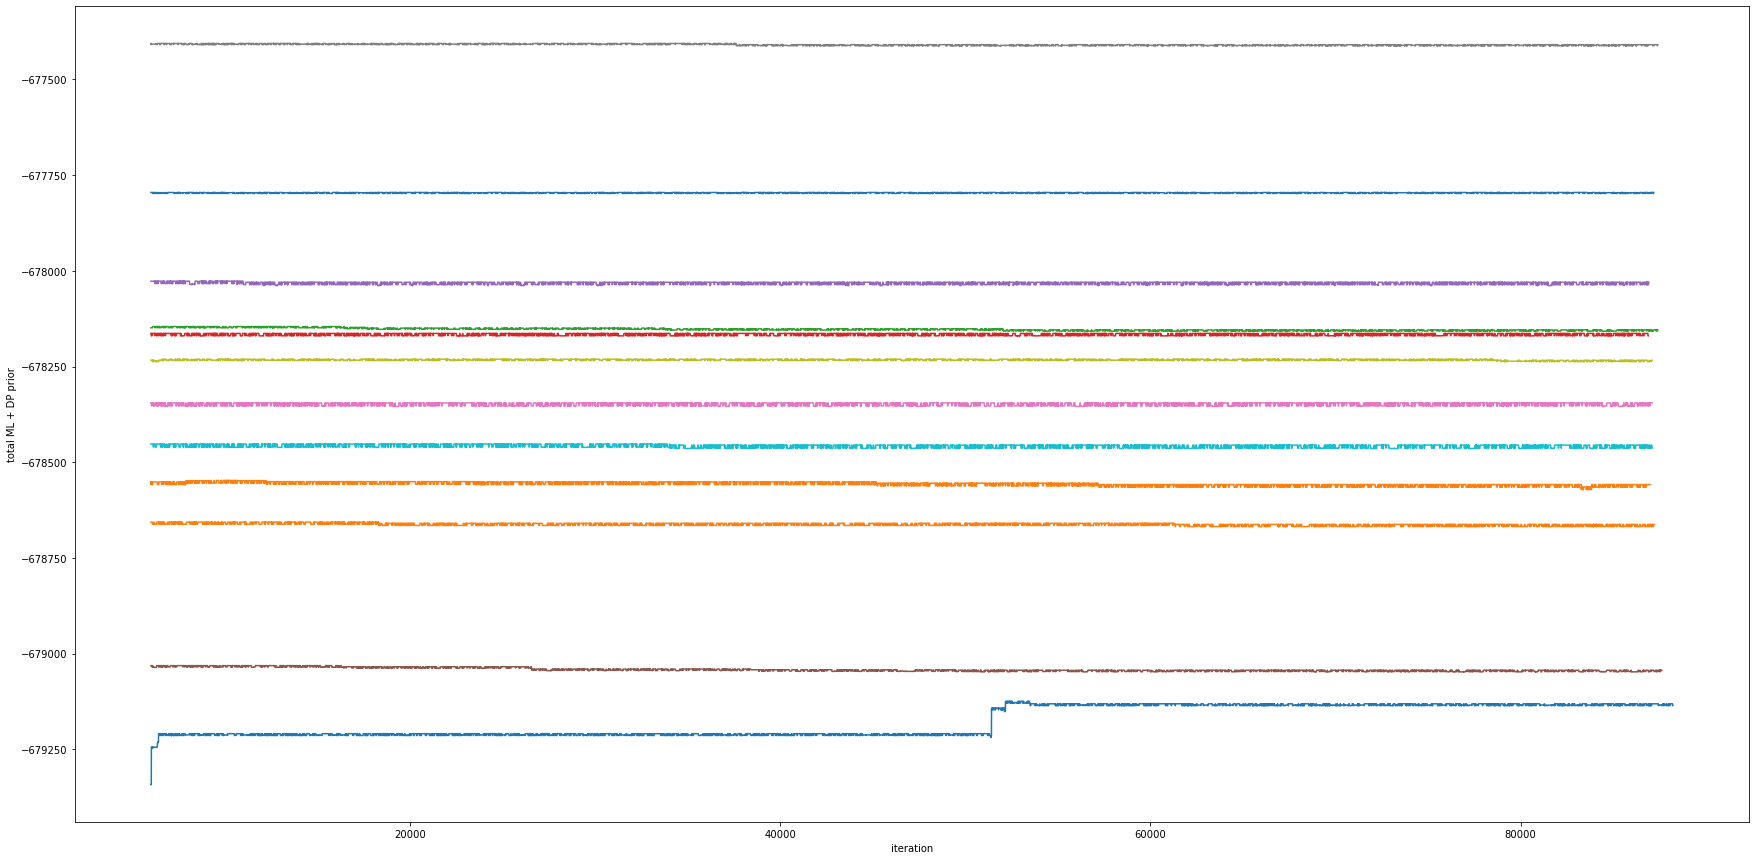

In [74]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[6000:len(m.MLDP_total_history)], m.MLDP_total_history[6000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

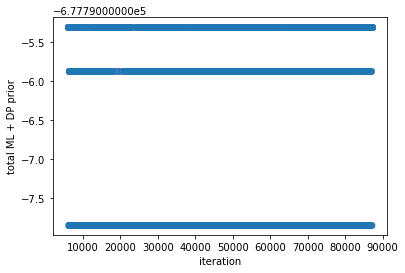

In [61]:
plt.scatter(np.r_[6000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[6000:], alpha=0.01)
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

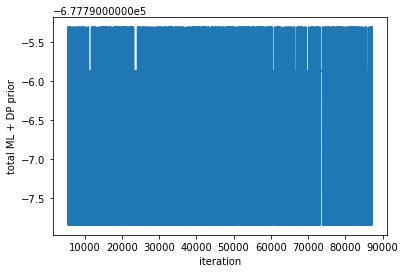

In [58]:
plt.plot(np.r_[5500:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[5500:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

coldstart200

In [75]:
with open('saved_multirun_cold_200.pickle', 'rb') as f:
    model_lst = pickle.load(f)

In [44]:
a_cov_dp = model_lst[-2]

Text(0.5, 0, 'iteration')

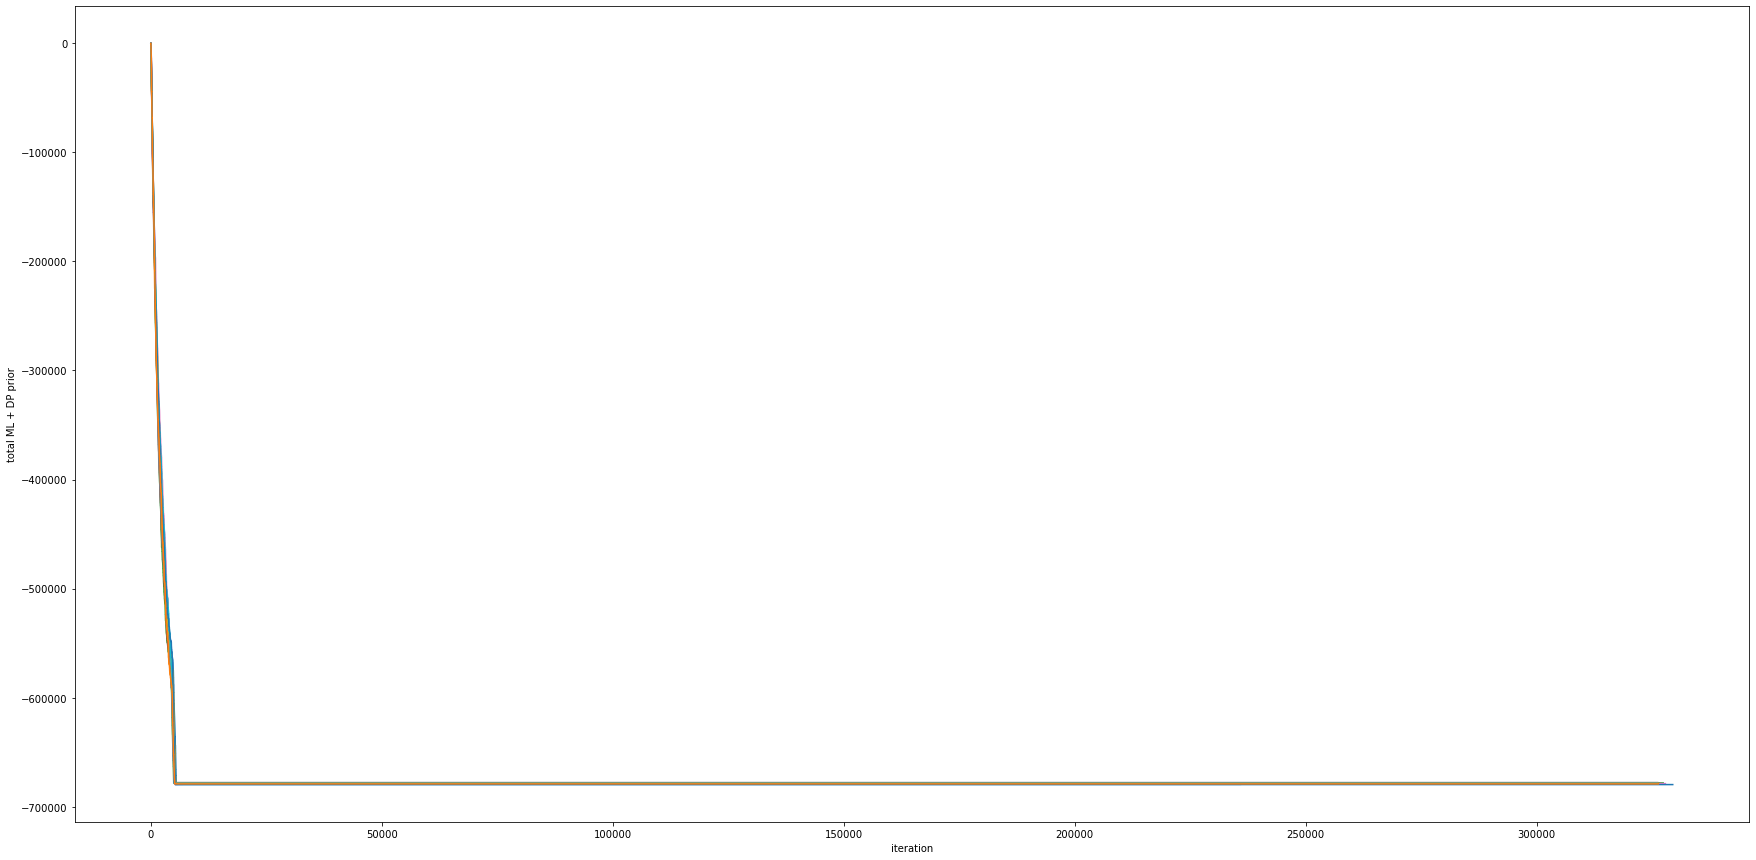

In [76]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[:len(m.MLDP_total_history)], m.MLDP_total_history)
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

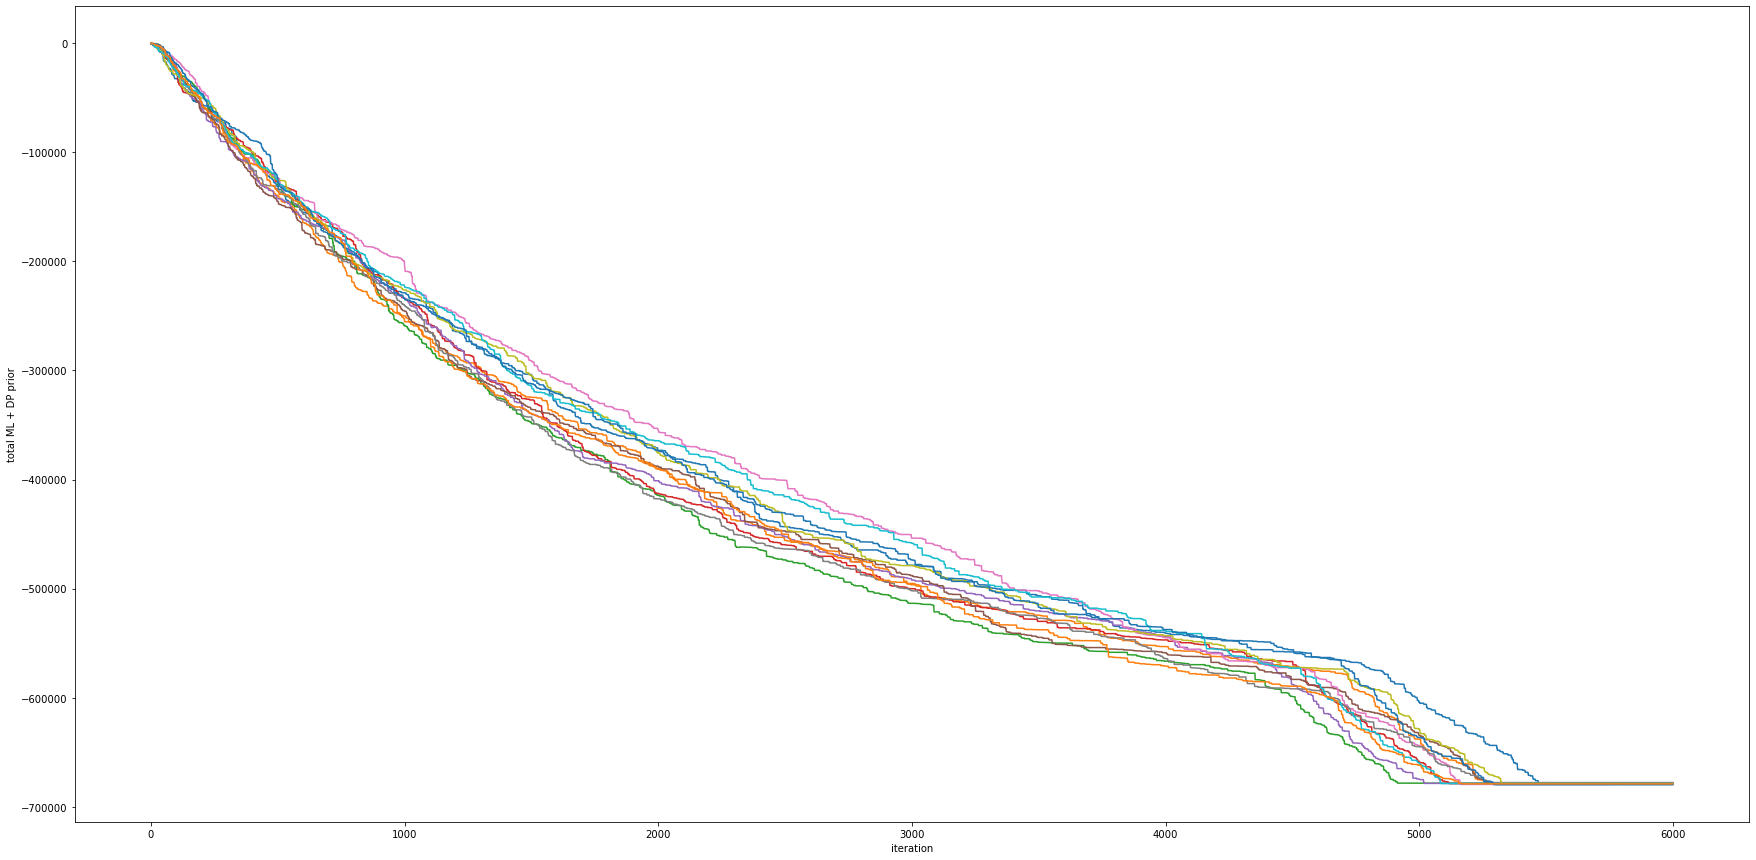

In [78]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[0:6000], m.MLDP_total_history[:6000])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

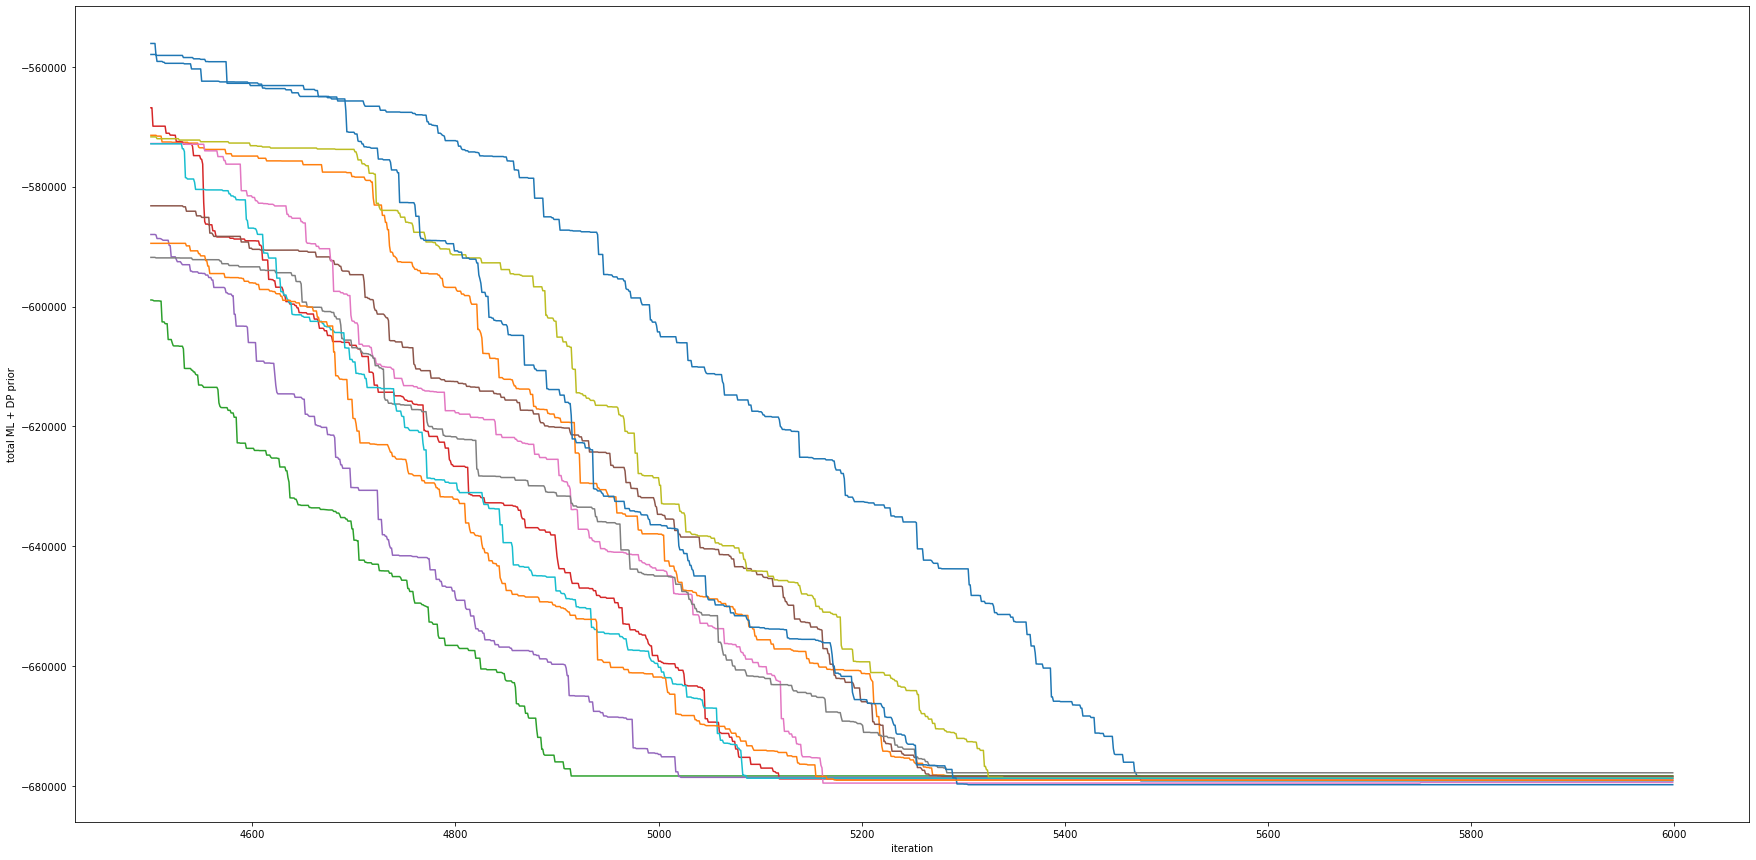

In [79]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[4500:6000], m.MLDP_total_history[4500:6000])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

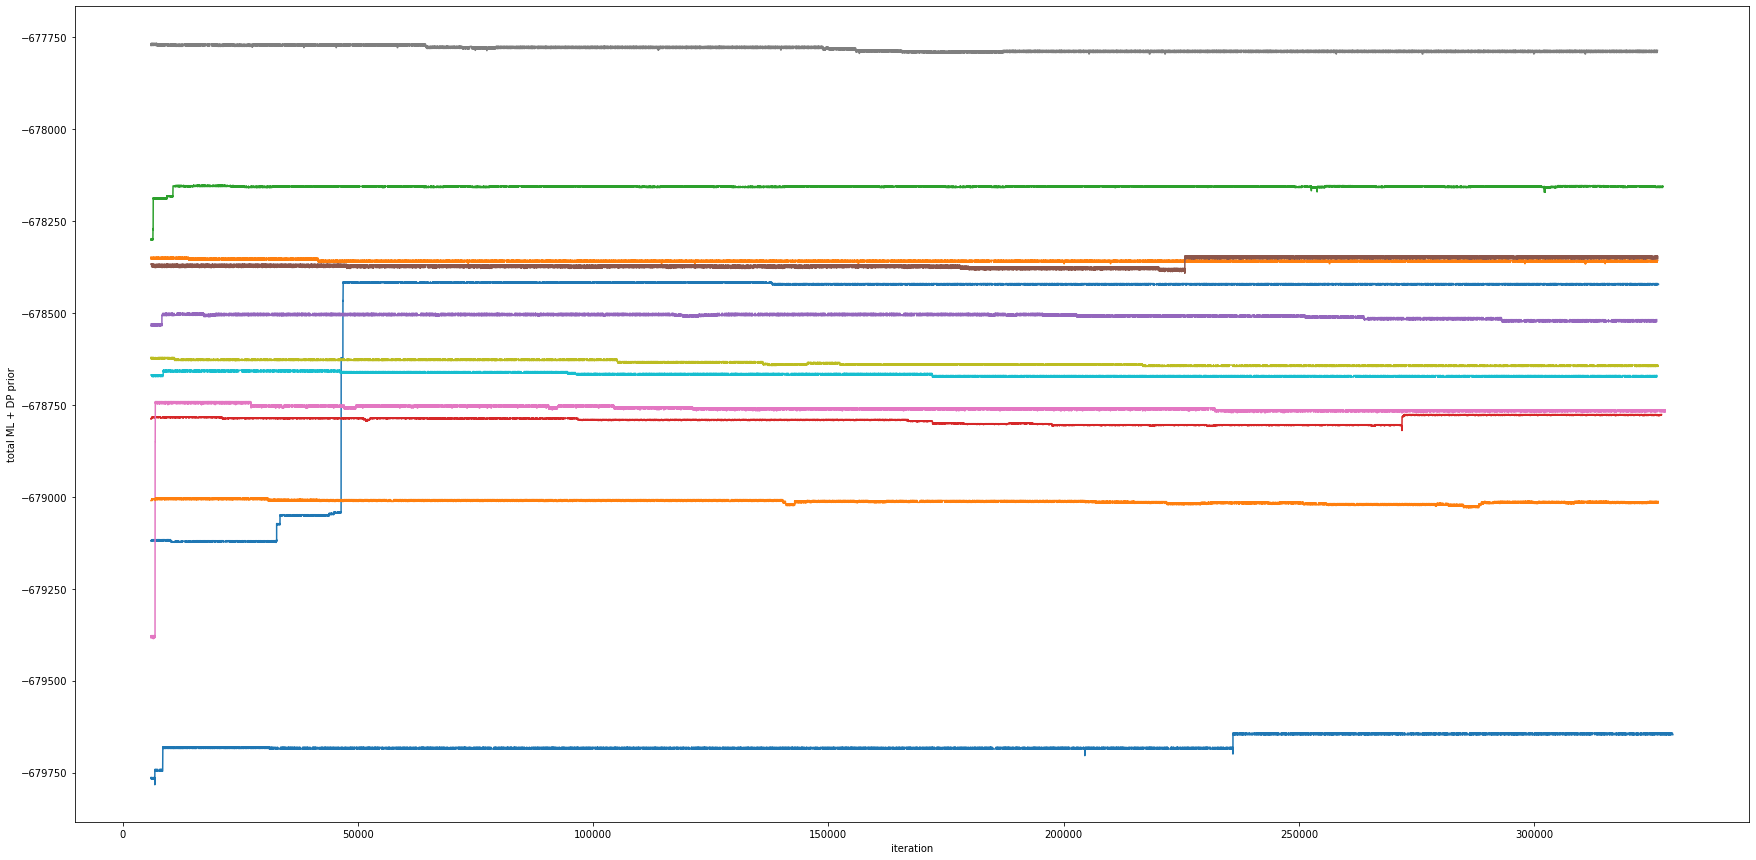

In [77]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[6000:len(m.MLDP_total_history)], m.MLDP_total_history[6000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

warmstart

In [80]:
with open('saved_multirun.pickle', 'rb') as f:
    model_lst = pickle.load(f)

Text(0.5, 0, 'iteration')

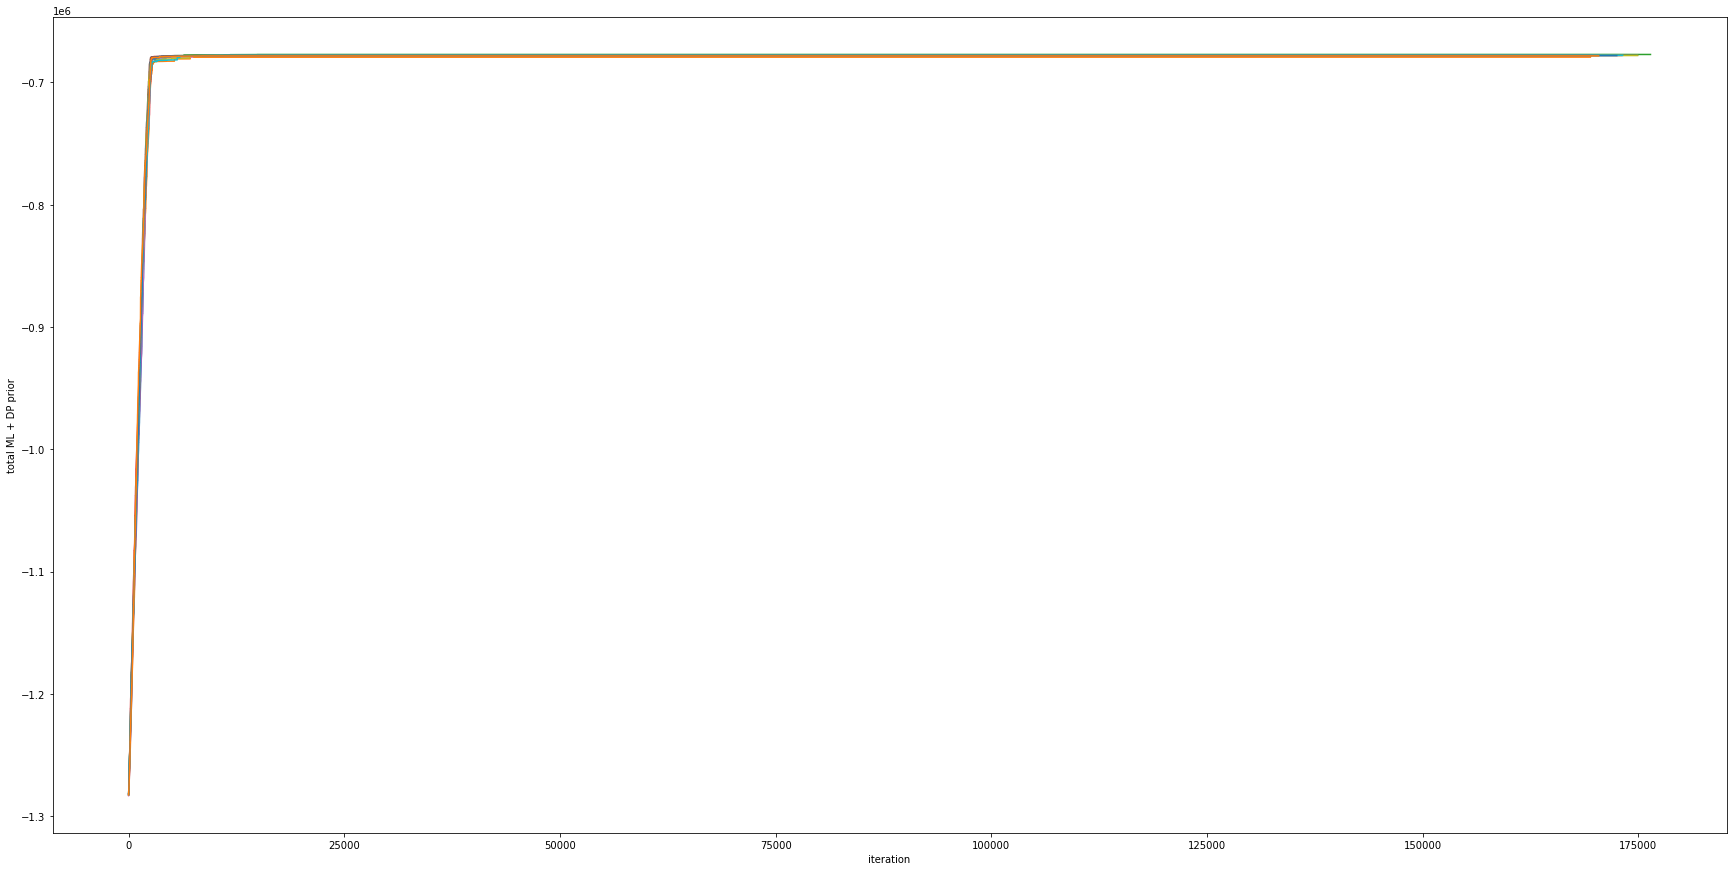

In [81]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[:len(m.MLDP_total_history)], m.MLDP_total_history)
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

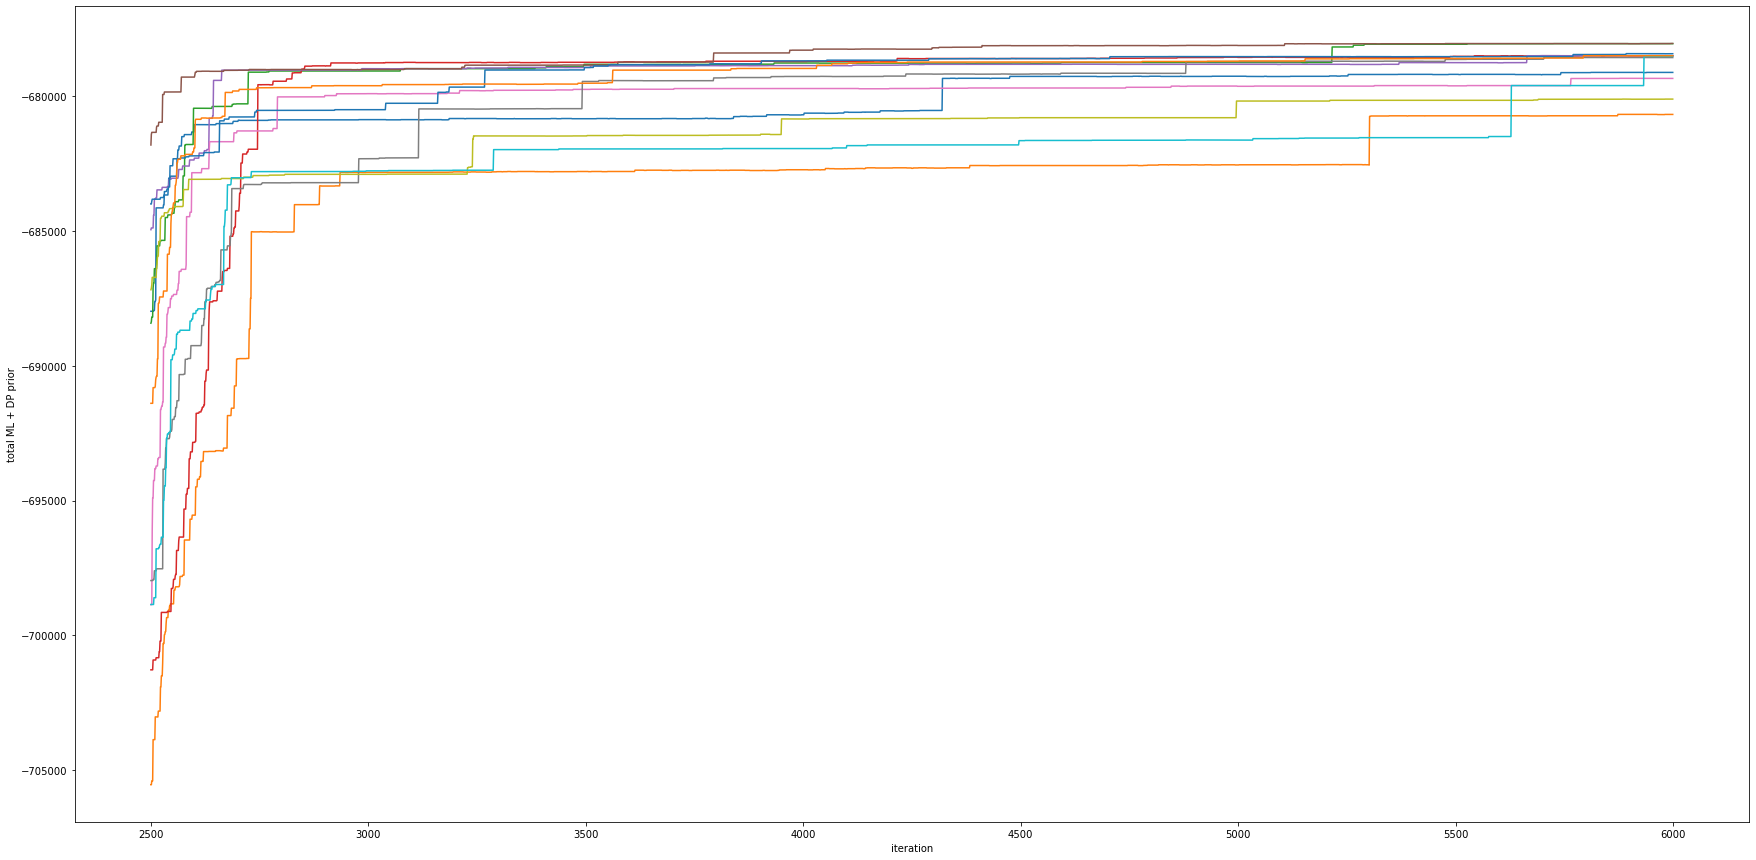

In [85]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[2500:6000], m.MLDP_total_history[2500:6000])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

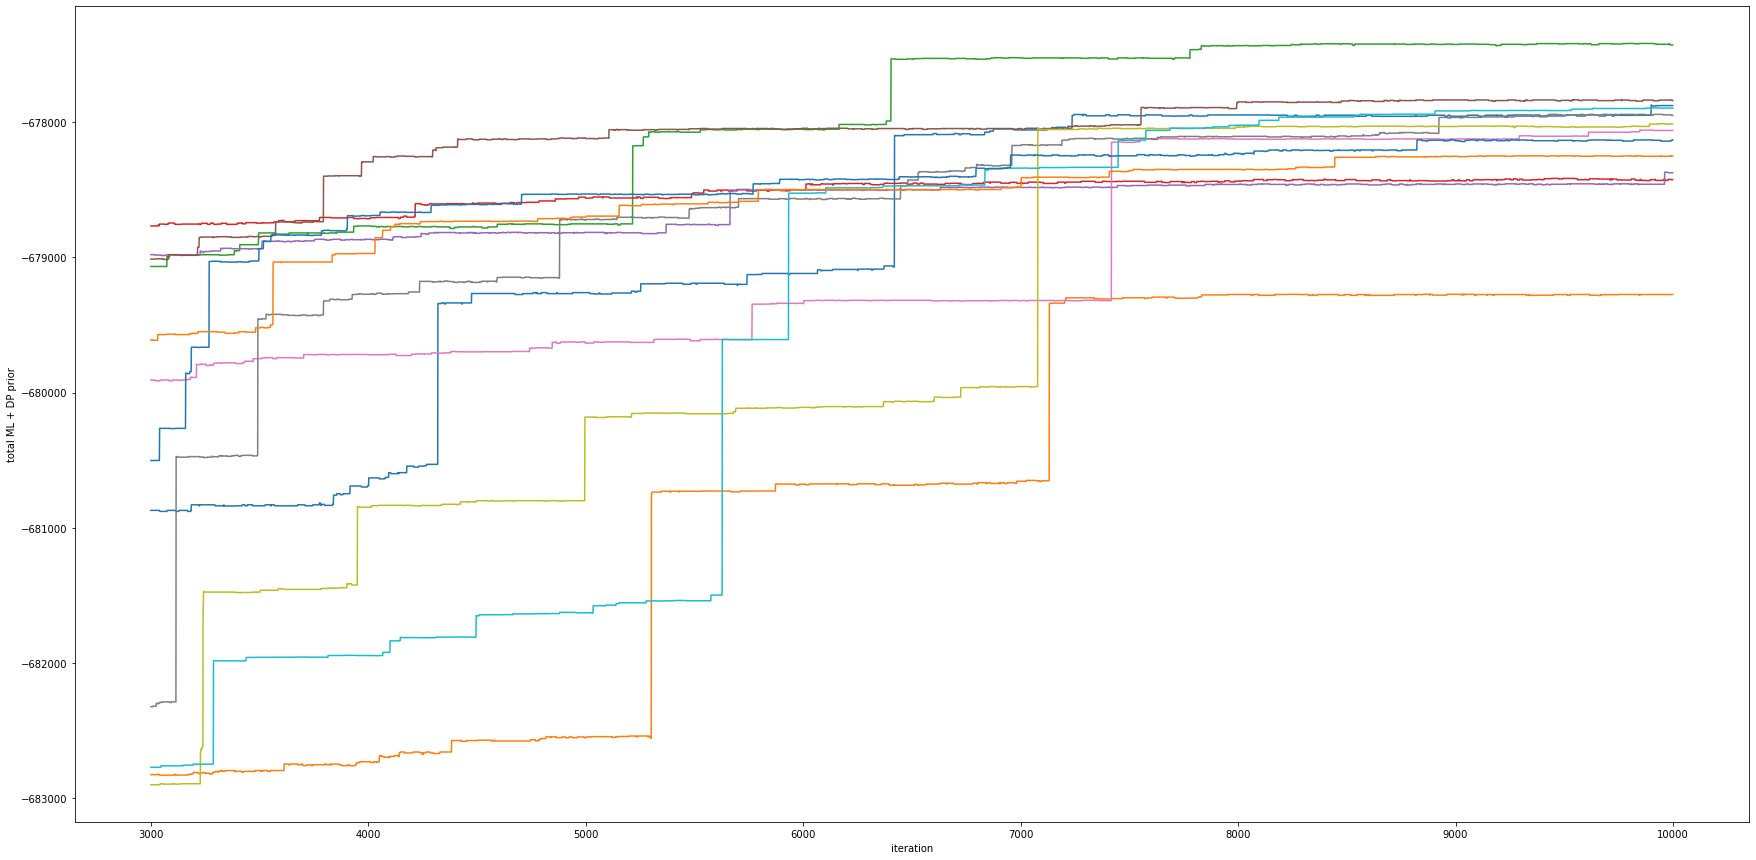

In [88]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[3000:10000], m.MLDP_total_history[3000:10000])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

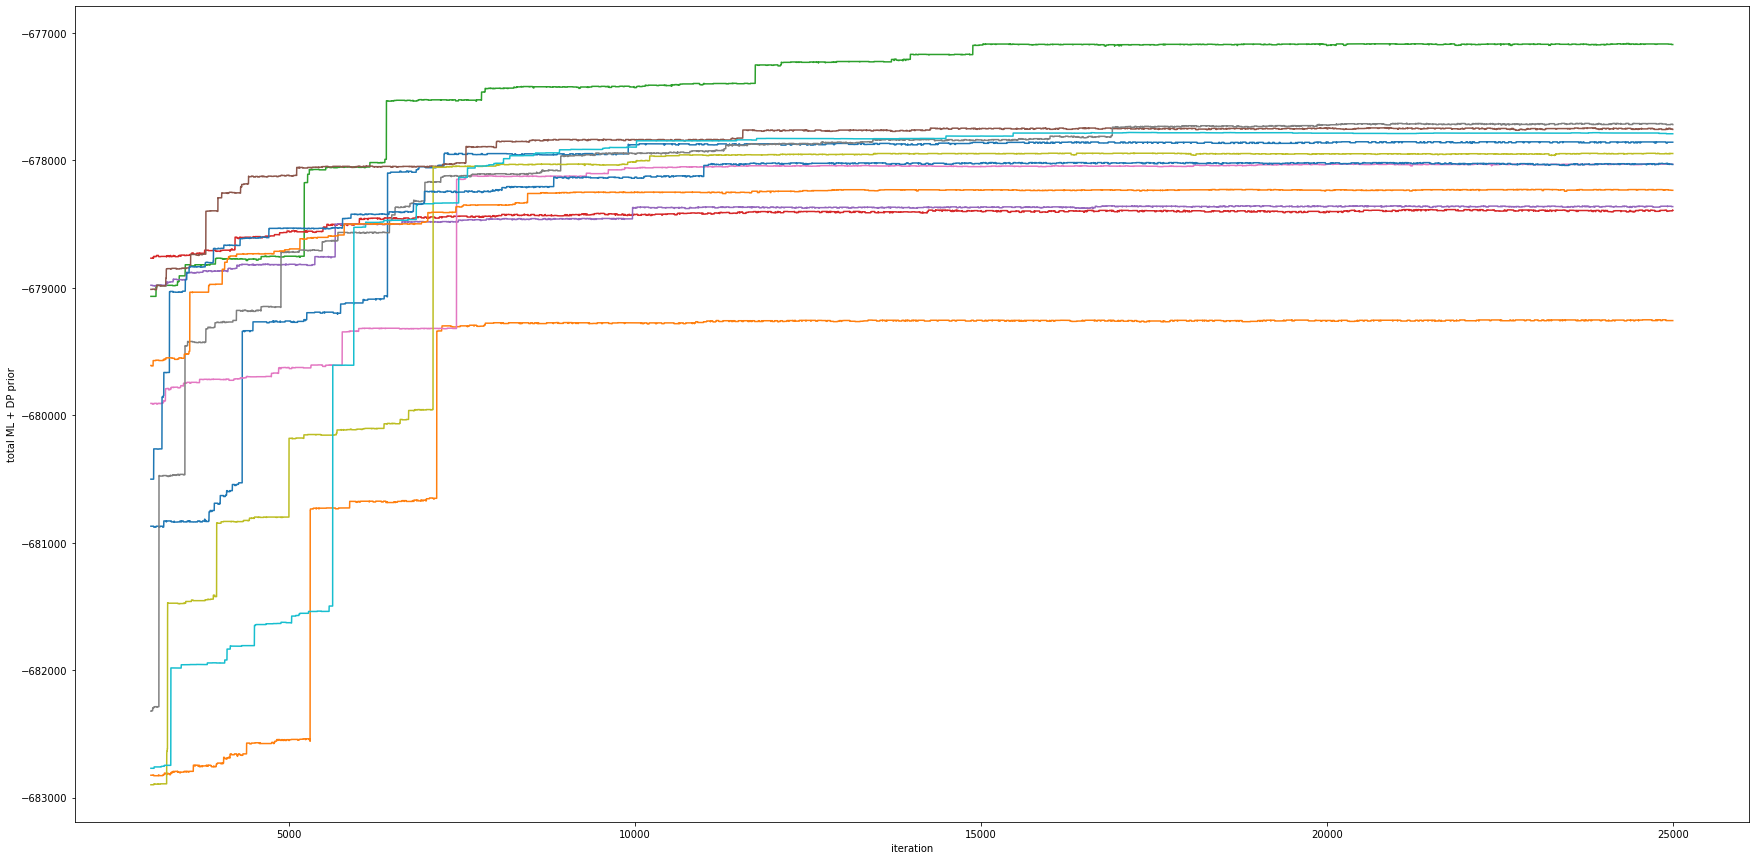

In [89]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[3000:25000], m.MLDP_total_history[3000:25000])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

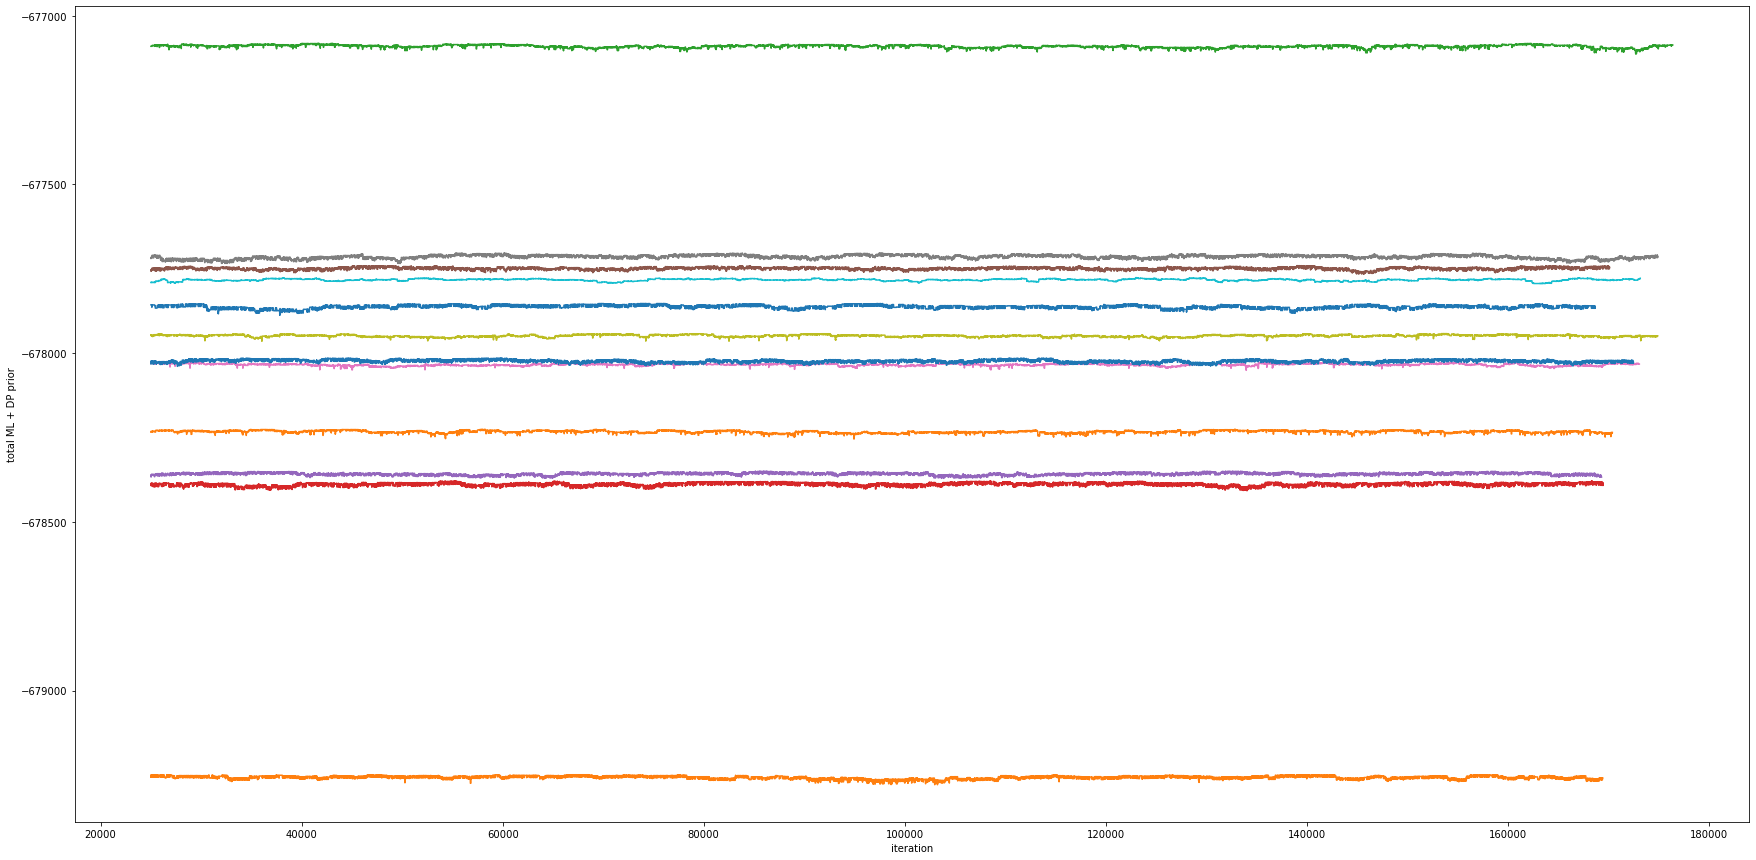

In [90]:
plt.figure(figsize=(30,15))
for m in model_lst:
    plt.plot(np.r_[25000:len(m.MLDP_total_history)], m.MLDP_total_history[25000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

In [99]:
a_cov_dp = model_lst[1]

In [100]:
def _scatter_apply(x, minor, major):
    f = np.zeros(len(x))
    f[x.allele == -1] = minor / (minor + major)
    f[x.allele == 1] = major / (minor + major)
    locs = x.start_g.values + (x.end_g.values - x.start_g.values)/2
    return locs, f
ADP_dict = {}
for ADP, group in a_cov_dp.cov_df.loc[a_cov_dp.cov_df.dp_draw == 0].groupby('allelic_cluster'):
    ADP_dict[ADP] = (group['maj_count'].sum(), group['min_count'].sum())

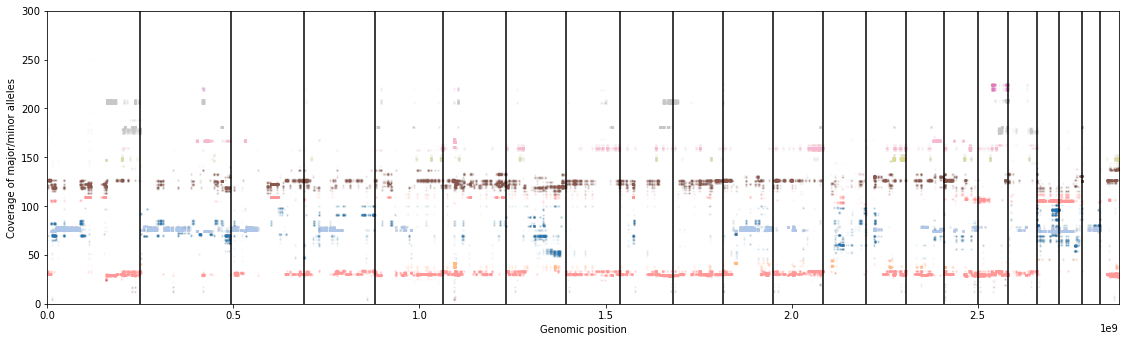

In [101]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

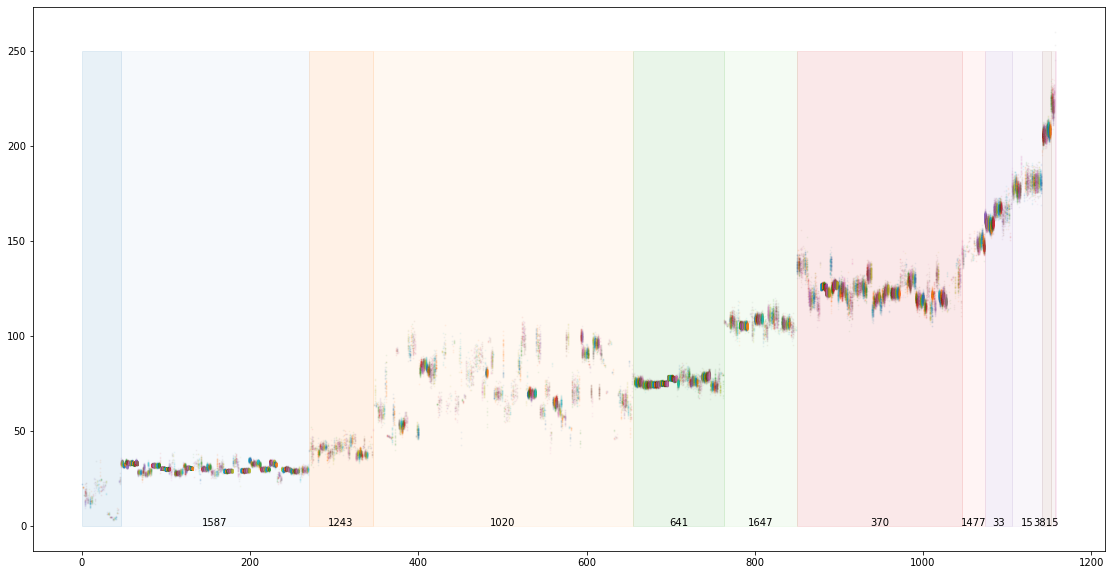

In [102]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))
    
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 2000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

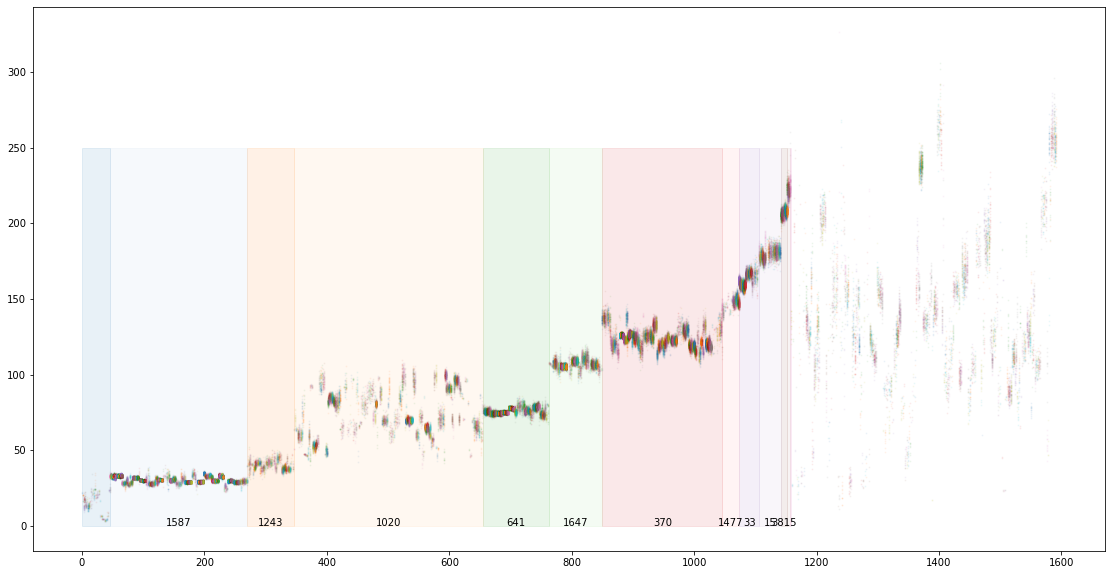

In [105]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))
    
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 2000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

for seg in a_cov_dp.greylist_segments:
    arr = a_cov_dp.segment_r_list[seg]
    ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
    counter+= 1

(array([270., 117.,  20.,  20.,   2.,   2.,   1.,   0.,   0.,   2.]),
 array([ 0.1669911 ,  8.26018261, 16.35337412, 24.44656564, 32.53975715,
        40.63294866, 48.72614018, 56.81933169, 64.9125232 , 73.00571471,
        81.09890623]),
 <BarContainer object of 10 artists>)

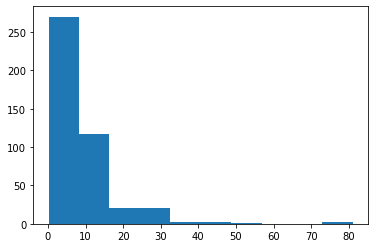

In [111]:
plt.hist(np.sqrt(np.array([a_cov_dp.segment_V_list[i] for i in a_cov_dp.greylist_segments])))